## Imports

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

## Load Data

In [2]:
iris = load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [3]:
iris_data = iris['data']
iris_target = iris['target']

In [4]:
np.unique(iris_target)

array([0, 1, 2])

In [5]:
dict(enumerate(iris['target_names']))

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [6]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [8]:
iris_df['target'] = iris_target

In [9]:
iris_df['target_name'] = iris_df['target'].map(dict(enumerate(iris['target_names'])))

In [10]:
iris_df['target_name'] = iris_df['target_name'].astype('category')

In [11]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Plot

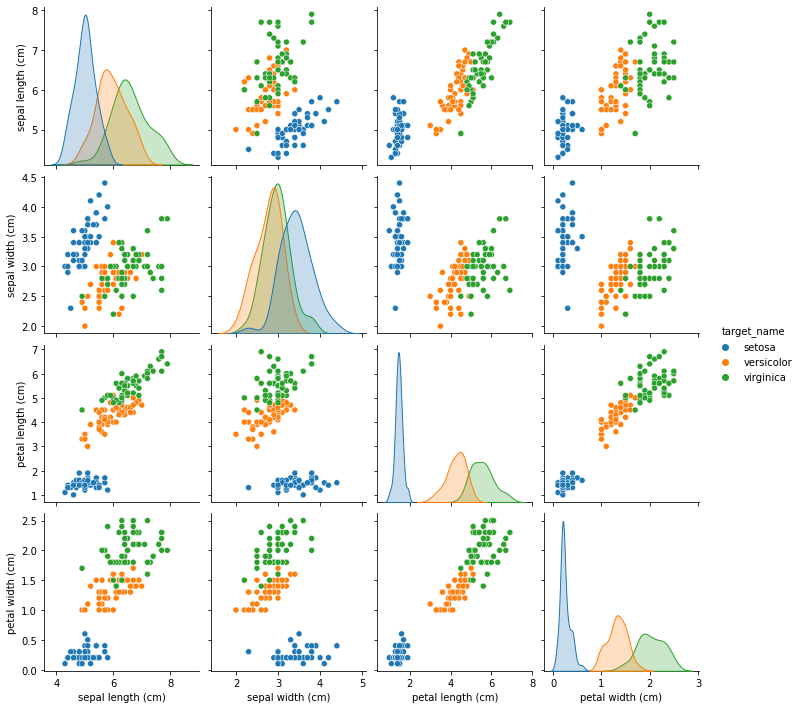

In [12]:
sns.pairplot(iris_df, vars=iris['feature_names'], hue='target_name')
plt.show()

## Binary Classification

In [13]:
bin_iris_df = iris_df[iris_df['target_name'] != 'setosa']

In [14]:
response = 'target'
predictors = ['petal width (cm)', 'petal length (cm)']

X = bin_iris_df[predictors].values
y = (bin_iris_df[response] == 2).astype(np.int32)

In [15]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [16]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(5,2),
                        max_iter=300,
                        activation='relu',
                        solver='adam')

In [18]:
mlp_clf.fit(X_scaled, y)

C:\Users\Lasha_Pertakhia\.conda\envs\data_science\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=300)

In [19]:
y_pred = mlp_clf.predict(X_scaled)

### Confusion Matrix

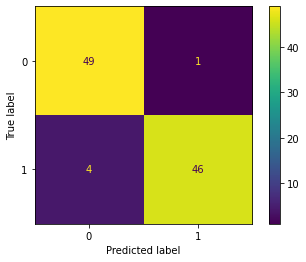

In [20]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
cm = confusion_matrix(y, y_pred)
# cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [21]:
tn, fp, fn, tp = cm.ravel()

In [22]:
precision_score(y, y_pred), tp / (fp + tp)

(0.9787234042553191, 0.9787234042553191)

In [23]:
recall_score(y, y_pred), tp / (fn + tp)

(0.92, 0.92)

In [24]:
f1_score(y, y_pred), tp / (tp + (fn + fp) / 2)

(0.9484536082474226, 0.9484536082474226)

In [25]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        50
           1       0.98      0.92      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



## Comparison

In [26]:
models = {
    'petal_width': ['petal width (cm)'],
    'petal_length': ['petal length (cm)'],
    'petal': ['petal length (cm)', 'petal width (cm)'],
    'sepal': ['sepal length (cm)', 'sepal width (cm)'],
    'full': ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
}

C:\Users\Lasha_Pertakhia\.conda\envs\data_science\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lasha_Pertakhia\.conda\envs\data_science\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lasha_Pertakhia\.conda\envs\data_science\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lasha_Pertakhia\.conda\envs\data_science\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

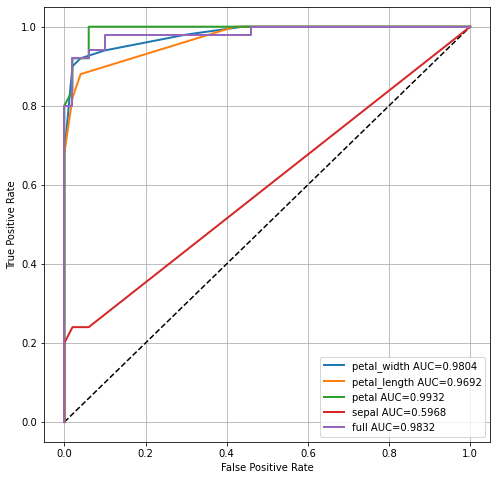

In [27]:
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')

for name, predictors in models.items():
    X = bin_iris_df[predictors]
    y = (bin_iris_df[response] == 2).astype(np.int32)
    # scale
    X_scaled = scaler.fit_transform(X)
    # model
    mlp_clf = MLPClassifier(hidden_layer_sizes=(5,2),
                            max_iter=300,
                            activation='relu',
                            solver='adam')
    mlp_clf.fit(X_scaled, y)
    # scores
    y_prob = mlp_clf.predict_proba(X_scaled)[:,1]
    # roc
    fpr, tpr, thresholds = roc_curve(y, y_prob)
    # auc
    roc_auc = roc_auc_score(y, y_prob)
    label = f'{name} AUC={roc_auc:.4}'
    # plot
    plt.plot(fpr, tpr, linewidth=2, label=label)
    # 

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()

C:\Users\Lasha_Pertakhia\.conda\envs\data_science\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lasha_Pertakhia\.conda\envs\data_science\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lasha_Pertakhia\.conda\envs\data_science\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lasha_Pertakhia\.conda\envs\data_science\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

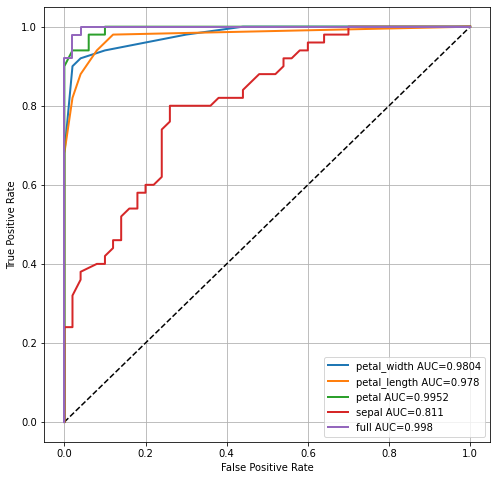

In [28]:
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')

for name, predictors in models.items():
    X = bin_iris_df[predictors]
    y = (bin_iris_df[response] == 2).astype(np.int32)
    # scale
    X_scaled = scaler.fit_transform(X)
    # model
    mlp_clf = MLPClassifier(hidden_layer_sizes=(25,10,5),
                            max_iter=300,
                            activation='relu',
                            solver='adam')
    mlp_clf.fit(X_scaled, y)
    # scores
    y_prob = mlp_clf.predict_proba(X_scaled)[:,1]
    # roc
    fpr, tpr, thresholds = roc_curve(y, y_prob)
    # auc
    roc_auc = roc_auc_score(y, y_prob)
    label = f'{name} AUC={roc_auc:.4}'
    # plot
    plt.plot(fpr, tpr, linewidth=2, label=label)
    # 

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()

## Hyper-Parameter Tuning

In [29]:
np.logspace(-4, -1, 4)


array([0.0001, 0.001 , 0.01  , 0.1   ])

In [30]:
np.round(np.logspace(7, 10, num=4, base=2)).astype("int")

array([ 128,  256,  512, 1024])

In [31]:
param_grid = {
    'hidden_layer_sizes': [(25, 10, 5), (5, 2), (100, 20, 5)],
    'max_iter': np.round(np.logspace(7, 10, num=4, base=2)).astype("int"),
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': np.logspace(-4, -1, 4),
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(MLPClassifier(), param_grid, n_jobs= -1, cv=5)
grid.fit(X_scaled, y)

C:\Users\Lasha_Pertakhia\.conda\envs\data_science\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (256) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': array([0.0001, 0.001 , 0.01  , 0.1   ]),
                         'hidden_layer_sizes': [(25, 10, 5), (5, 2),
                                                (100, 20, 5)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': array([ 128,  256,  512, 1024]),
                         'solver': ['sgd', 'adam']})

In [32]:
print(grid.best_params_)

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (25, 10, 5), 'learning_rate': 'adaptive', 'max_iter': 256, 'solver': 'adam'}


In [33]:
y_grid_pred = grid.predict(X_scaled) 

In [34]:
print(classification_report(y, y_grid_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

